Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,036,490 (3.95 MB)

 Trainable params: 1,036,490 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 151s 78ms/step - accuracy: 0.6379 - loss: 1.0043
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 147s 79ms/step - accuracy: 0.8480 - loss: 0.4436
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 173s 92ms/step - accuracy: 0.8764 - loss: 0.3663
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 166s 88ms/step - accuracy: 0.8874 - loss: 0.3263
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 78ms/step - accuracy: 0.9005 - loss: 0.2913
313/313 - 7s - 22ms/step - accuracy: 0.9056 - loss: 0.2708

Test accuracy: 0.9056000113487244
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


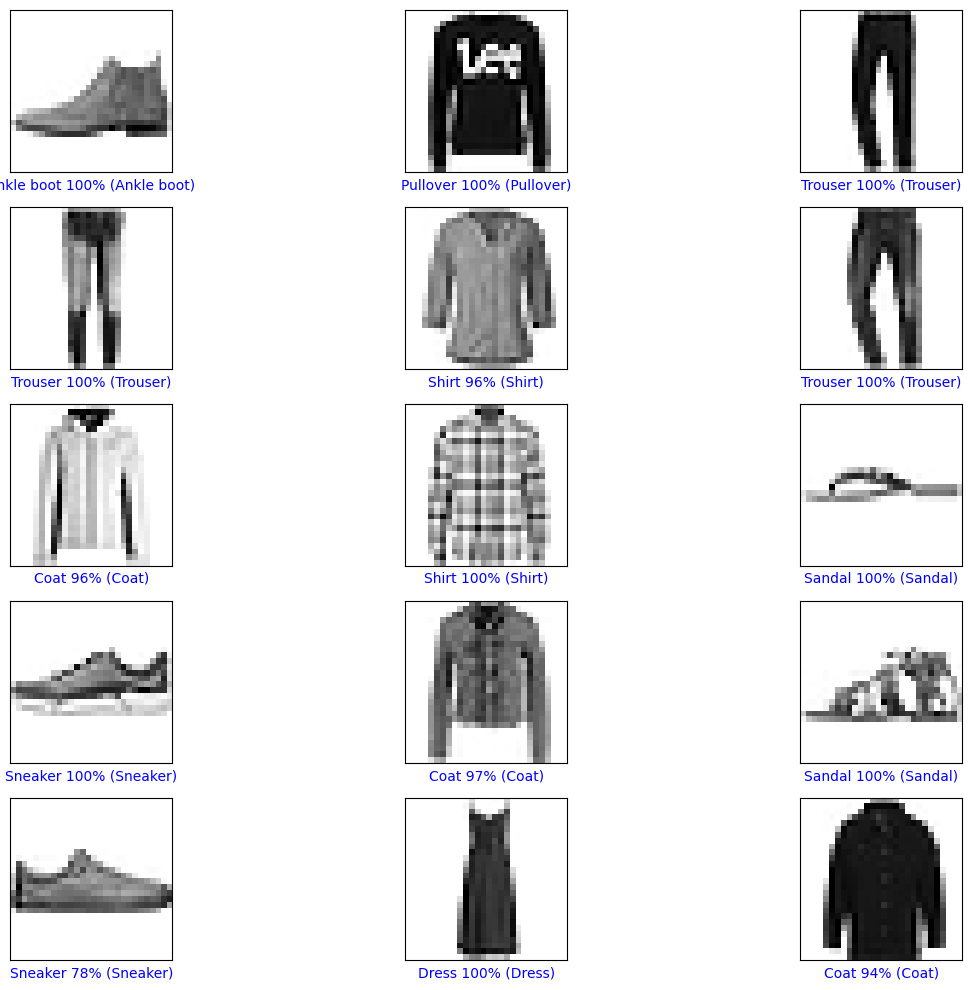

In [2]:
# Import necessary modules
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data by scaling pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build a simple CNN model
model = keras.models.Sequential([
keras.layers.Conv2D(filters=64, kernel_size=7, strides=(1,1), activation="relu", padding="same", input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax")
])


print(model.summary())

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate accuracy on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_images)

# Function to plot image and prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Plot some test images with their predicted labels
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()
